<a href="https://colab.research.google.com/github/Praneeth-18/DataMining6/blob/main/Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets for CMPE 255/clustering.csv"
df = pd.read_csv(path)

Hierarchical clustering is a method that groups similar elements into entities known as clusters. This algorithm results in a collection of clusters, each distinct from the others, with the members of each cluster being broadly similar.

There are two main types of hierarchical clustering:

**Agglomerative Clustering**:

This is a bottom-up approach where the process begins with each element as a separate cluster and then merges them into larger clusters.

**Divisive Clustering**:

In contrast, divisive clustering is a top-down approach. It starts with all observations in a single large cluster and then splits them into smaller clusters.

**A key tool in hierarchical clustering is the Dendrogram:**

A dendrogram is a tree-like diagram that shows the arrangements of the clusters produced during the clustering process.


Individual elements are placed at the bottom of the dendrogram and are called leaf nodes.


Clusters are formed by connecting leaf nodes and existing clusters, with the connection points called nodes.


**Another important concept is the Silhouette Score, which is used to measure the quality of clustering:**

The silhouette score is a value that ranges from -1 to 1 and indicates how well-separated the clusters are.

A score close to 1 suggests that the clusters are well-separated and distinct.

A score around 0 indicates overlapping clusters where separation is not clear.

A score near -1 implies that the clustering configuration might be inappropriate, with clusters incorrectly assigned.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs


In [4]:
# Generating synthetic data
X, _ = make_blobs(n_samples=150, n_features=2, centers=4, cluster_std=1.5, random_state=42)

# If you have your own data, load it here
# X = pd.read_csv('your_data.csv')

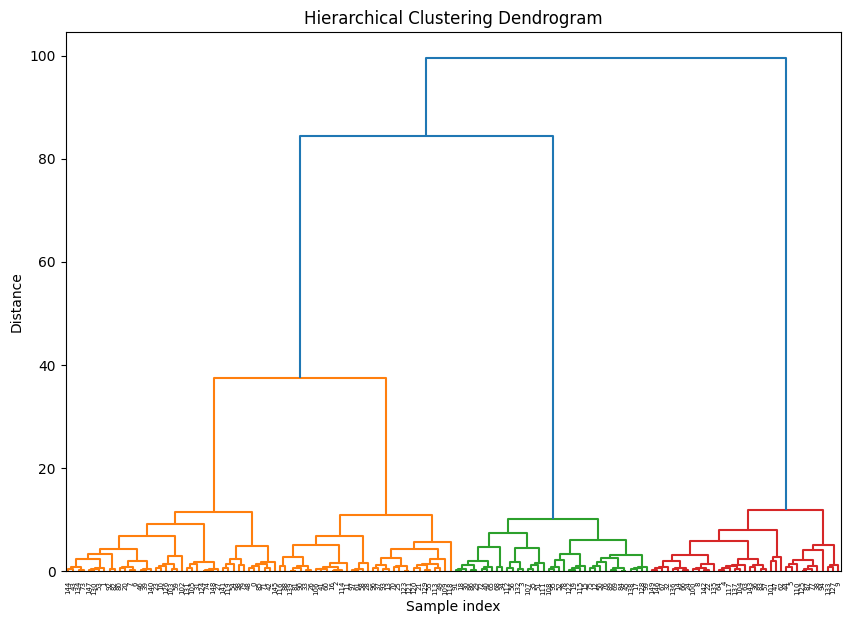

In [5]:
# Using the linkage function to perform hierarchical clustering
linked = linkage(X, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [6]:
# Fitting the Agglomerative Clustering model
# You can change 'n_clusters' based on the dendrogram or your requirement
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(X)

# Calculating silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.68


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


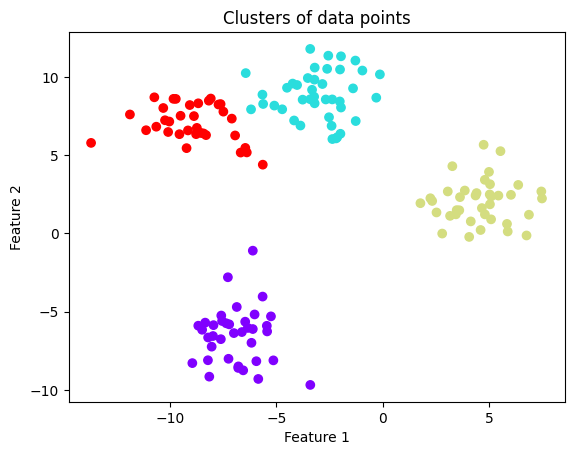

In [7]:
# Visualizing the clusters
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='rainbow')
plt.title('Clusters of data points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
from sklearn.metrics import silhouette_samples
silhouette_vals = silhouette_samples(X, cluster_labels)

In [11]:
import matplotlib.cm as cm
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score


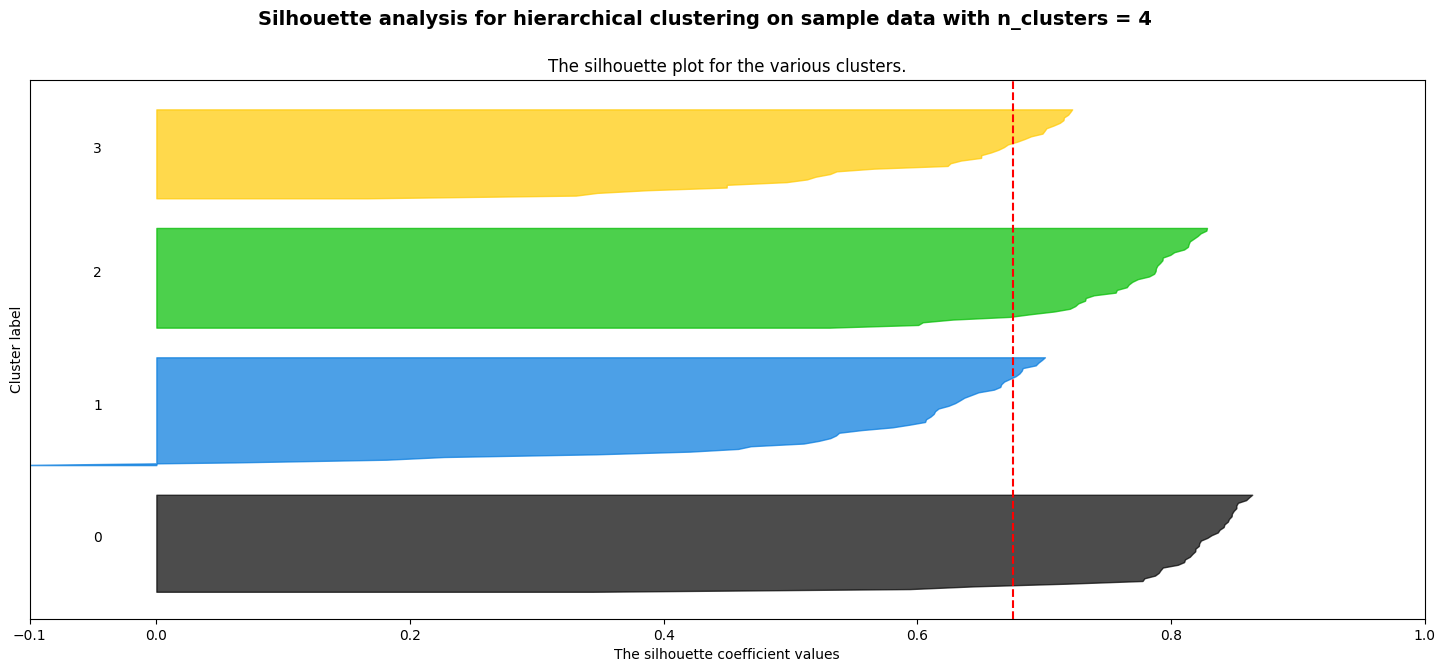

In [12]:
# Number of clusters
n_clusters = len(np.unique(cluster_labels))

# Create a subplot with 1 row and 2 columns
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
silhouette_avg = silhouette_score(X, cluster_labels)
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.suptitle(("Silhouette analysis for hierarchical clustering on sample data "
              "with n_clusters = %d" % n_clusters),
             fontsize=14, fontweight='bold')

plt.show()


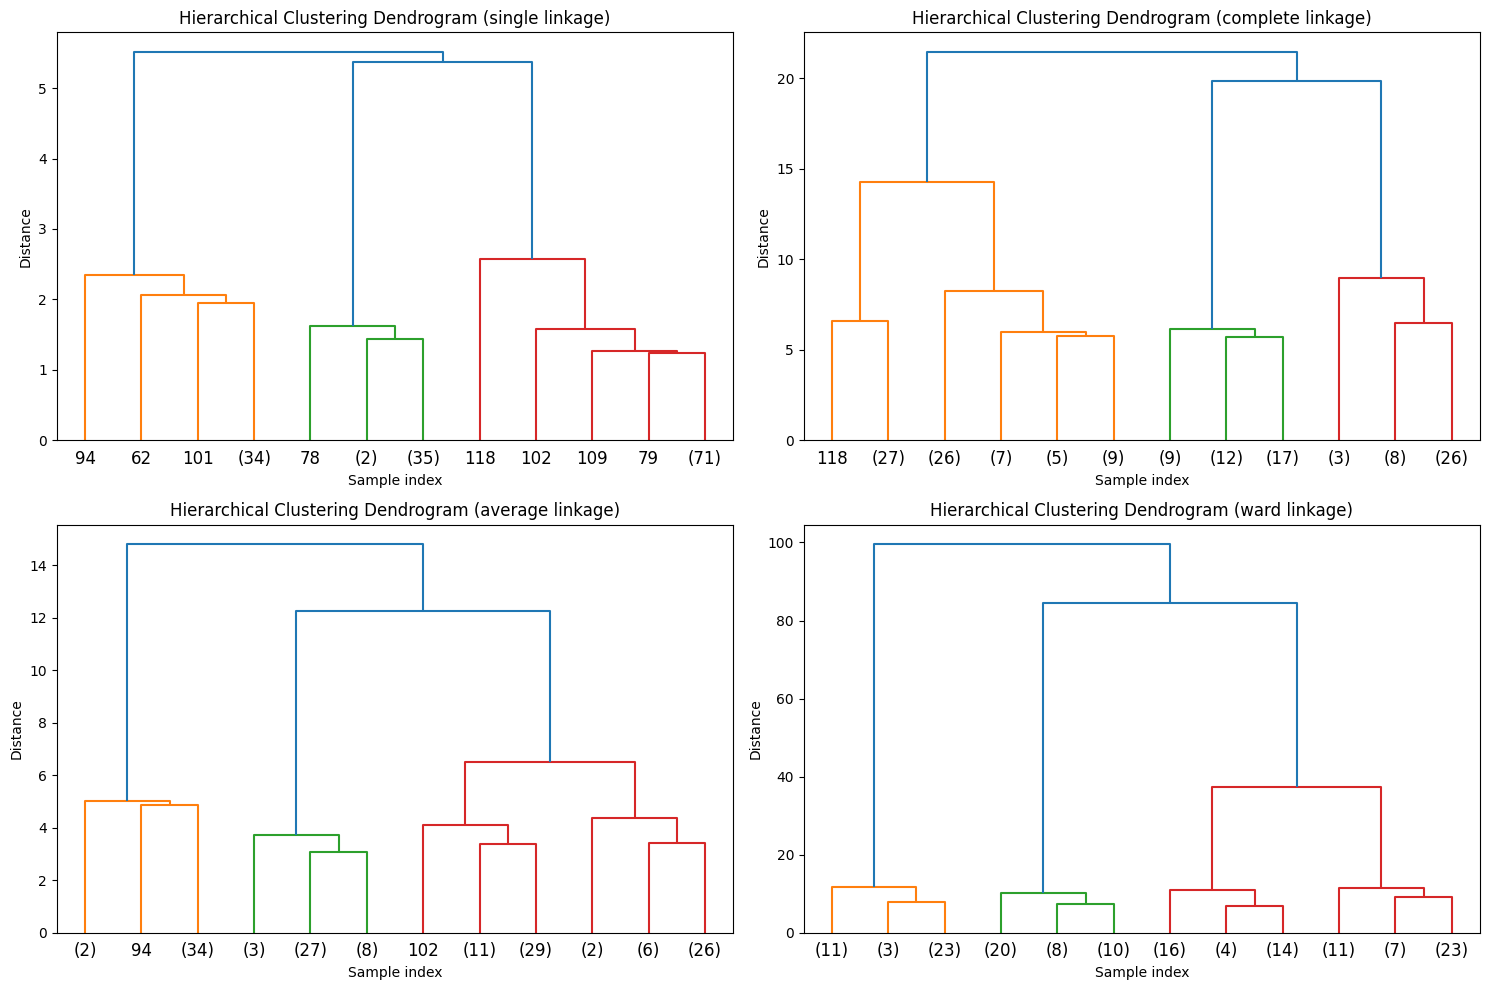

In [20]:
linkage_types = ['single', 'complete', 'average', 'ward']

plt.figure(figsize=(15, 10))
for i, method in enumerate(linkage_types):
    # Compute the linkage
    linked = linkage(X, method=method)

    # Create a subplot for each linkage type
    ax = plt.subplot(2, 2, i + 1)
    dendrogram(linked, ax=ax, truncate_mode='lastp', p=12)
    plt.title('Hierarchical Clustering Dendrogram (' + method + ' linkage)')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()

['setosa' 'versicolor' 'virginica']


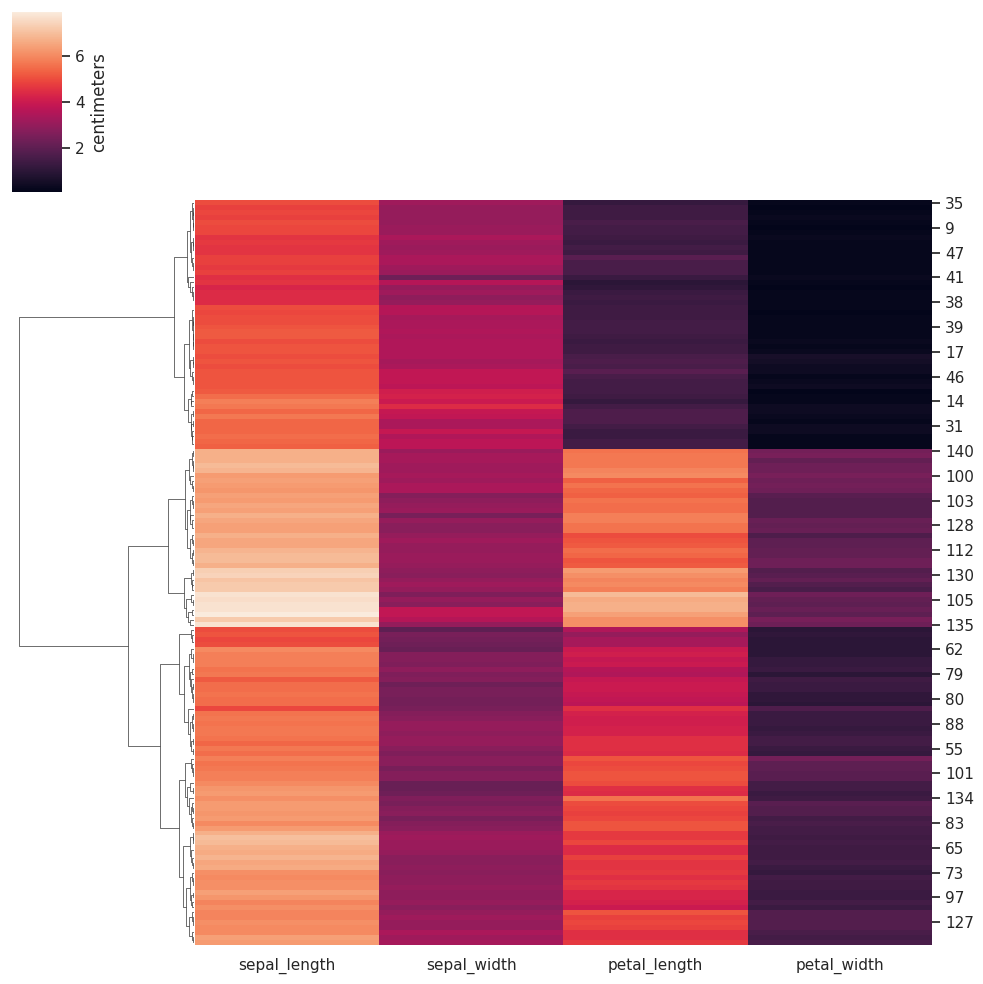

In [21]:
import seaborn as sns; sns.set(color_codes=True)
iris = sns.load_dataset("iris")
species = iris.pop("species")   # Remove the species column
print(species.unique())         # The samples seems to be from these three species
sns.clustermap(iris, method="ward", col_cluster=False, cbar_kws={'label': 'centimeters'}); # Cluster only the rows
#plt.colorbar().ax.set_title('This is a title')
#plt.gca().images[-1].colorbar.ax.set_title("title")
